<a href="https://colab.research.google.com/github/CodyByre/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
plt.style.use('fast')

In [0]:
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
titanic = pd.read_csv(url)
titanic.sample(3)

,Survived,Pclass,Sex,Age,Fare,Embarked
709,1,1,female,19.0,30.0,Southampton
458,1,2,female,25.0,30.0,Southampton
52,0,2,male,32.0,10.5,Southampton


In [0]:
titanic['Pclass'].value_counts().sort_index()

1    184
2    173
3    355
Name: Pclass, dtype: int64

In [0]:
titanic['cabin_class'] = titanic['Pclass'].map({1:'first', 2:'second', 3:'third'})
titanic.sample(5)

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
286,0,2,female,38.0,13.000,Southampton,second
680,0,2,female,44.0,26.000,Southampton,second
334,0,2,male,30.0,13.000,Southampton,second
554,1,1,female,18.0,227.525,Cherbourg,first
644,0,2,male,39.0,13.000,Southampton,second


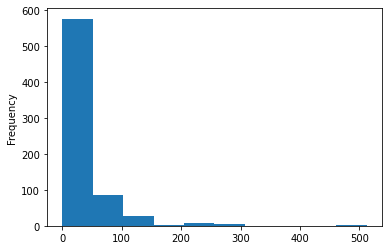

In [0]:
titanic['Fare'].plot(kind='hist');

In [0]:
print(titanic.shape)
titanic=titanic[titanic['Fare']<500]
print(titanic.shape)

(712, 7)
(709, 7)


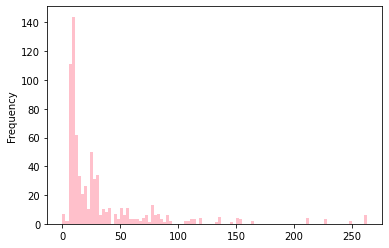

In [0]:
titanic['Fare'].plot(kind='hist', color='pink', bins=100);

In [0]:
titanic['Fare'].describe()

count    709.000000
mean      32.545692
std       42.931277
min        0.000000
25%        8.050000
50%       15.500000
75%       32.320800
max      263.000000
Name: Fare, dtype: float64

In [0]:
farelabels = ['low', 'medium', 'high', 'vhigh']
titanic['fare_groups'] = pd.cut(titanic['Fare'], bins=[0,9,16,33,300], labels=farelabels)
titanic[['Fare', 'fare_groups']].tail()

,Fare,fare_groups
707,29.125,high
708,13.000,medium
709,30.000,high
710,30.000,high
711,7.750,low


In [0]:
fare_results = titanic['fare_groups'].value_counts().sort_index()

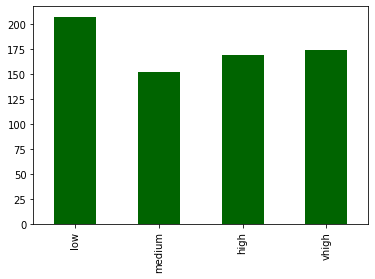

In [0]:
fare_results.plot(kind='bar', color='darkgreen');

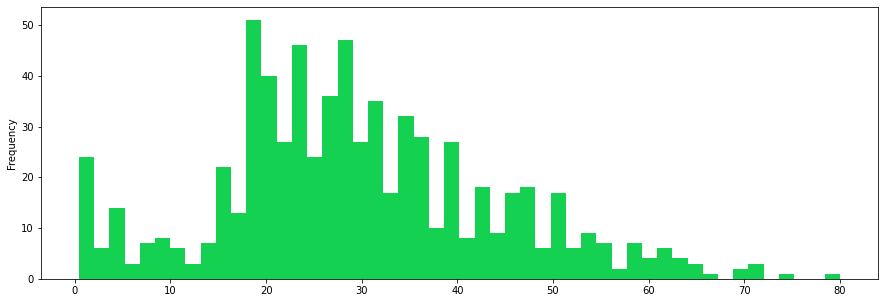

In [0]:
titanic['Age'].plot(kind='hist',
                    bins=50,
                    figsize=(15,5),
                    color='#15D152');

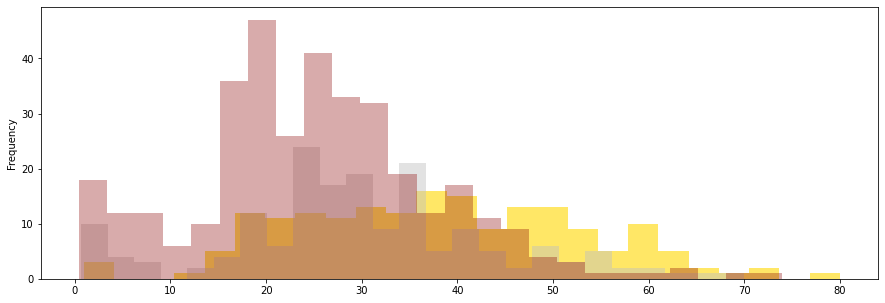

In [0]:
titanic[titanic['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(15,5), color='gold', alpha=0.6)
titanic[titanic['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(15,5), color='silver', alpha=0.45)
titanic[titanic['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(15,5), color='darkred', alpha=0.33)

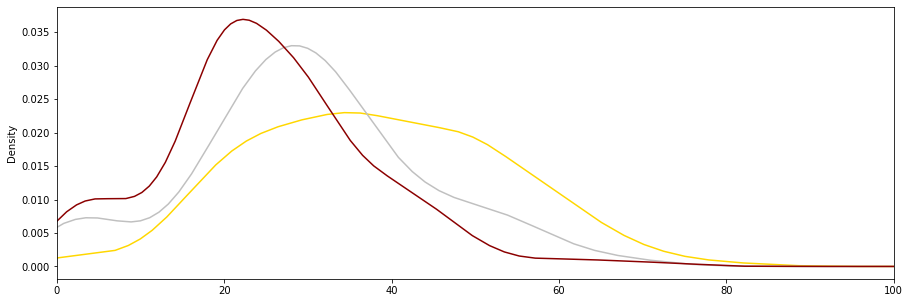

In [0]:
titanic[titanic['Pclass']==1]['Age'].plot(kind='density', figsize=(15,5), color='gold', xlim=(0,100))
titanic[titanic['Pclass']==2]['Age'].plot(kind='density', figsize=(15,5), color='silver',  xlim=(0,100))
titanic[titanic['Pclass']==3]['Age'].plot(kind='density', figsize=(15,5), color='darkred',  xlim=(0,100))

In [0]:
cab_death = pd.crosstab(titanic['cabin_class'], titanic['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


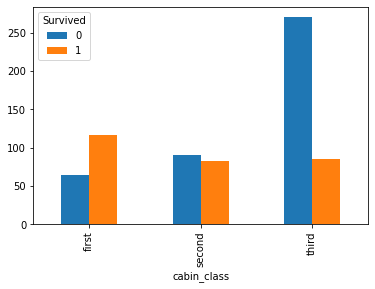

In [0]:
cab_death.plot(kind='bar');

In [0]:
cab_death1 = pd.crosstab(titanic['cabin_class'], titanic['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


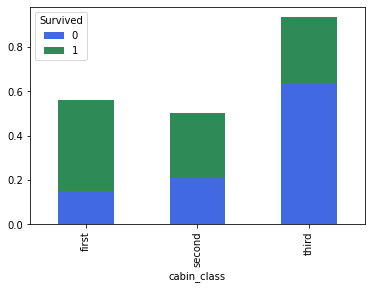

In [0]:
cab_death1.plot(kind='bar',stacked=True, color=['royalblue', 'seagreen']);

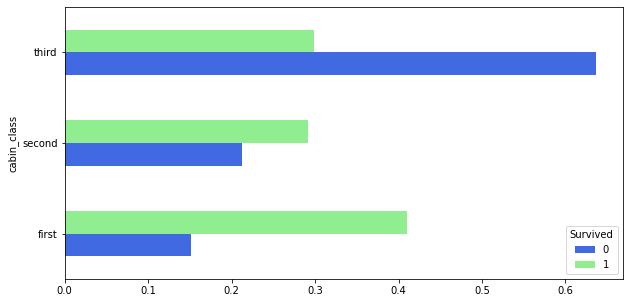

In [0]:
cab_death1.plot(kind='barh', color=['royalblue', 'lightgreen'], figsize=(10,5));

In [0]:
cab_age = titanic.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

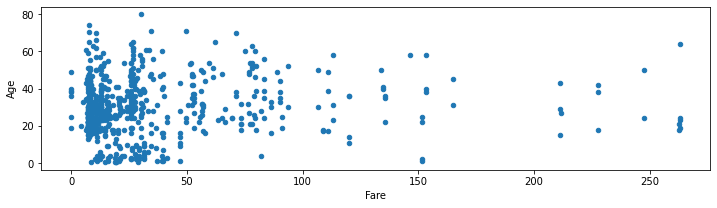

In [0]:
titanic.plot(kind='scatter', x='Fare', y='Age', figsize = (12,3));

In [0]:
# Skipping ahead. For more practice, pick up again here later.
# Definitely do the part that was skipped over in lecture

In [0]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
plt.style.use('fivethirtyeight')

In [0]:
fakelist=[38, 3, 2, 1, 3, 6, 8, 7, 7, 34]
fake = pd.Series(fakelist, index=range(1,11))

In [0]:
fake

1     38
2      3
3      2
4      1
5      3
6      6
7      8
8      7
9      7
10    34
dtype: int64

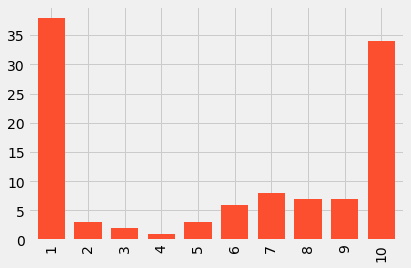

In [0]:
fake.plot.bar(color='C1', width=0.75);

In [0]:
display(example)

In [0]:
fakelist2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


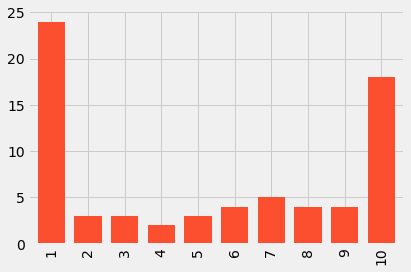

In [0]:
fake2 = pd.Series(fakelist2)
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.75);

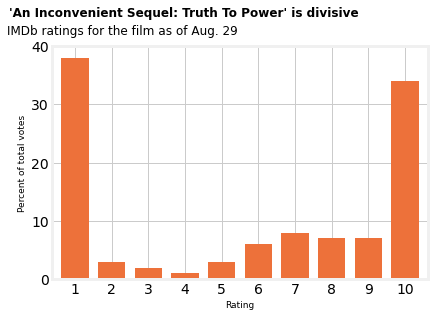

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="none")
fake.plot.bar(width=0.75, color='#ED713A')
ax.set(facecolor='none')
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.85, y=42);
ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

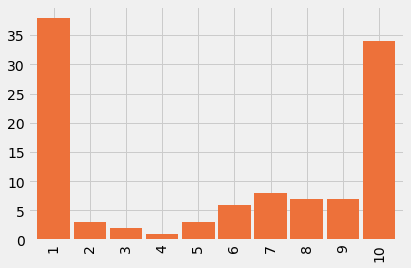

In [0]:
# This cell from lecture is worth reviewing for full understanding of process
# fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=45)
ax.set_yticklabels(range(0,50,10), rotation=45)
ax.set_yticks(range(0,50,5));

In [0]:
# now real data
ratings = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
ratings.sample(3)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
3889,2017-07-26 02:00:03.108592,19,Females Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-fe...,7.3,8.2,10,2,0,0,1,1,0,0,3,0,12,10.5,0.0,0.0,5.3,5.3,0.0,0.0,15.8,0.0,63.2
65127,2017-08-24 12:20:04.406825,739,Aged 30-44,http://www.imdb.com/title/tt6322922/ratings-age_3,5.6,5.6,7,277,21,12,3,20,31,48,33,47,247,37.5,2.8,1.6,0.4,2.7,4.2,6.5,4.5,6.4,33.4
77333,2017-08-28 23:20:06.211579,922,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,33,20,8,9,30,54,46,58,259,43.9,3.6,2.2,0.9,1.0,3.3,5.9,5.0,6.3,28.1


In [0]:
ratings['timestamp1'] = pd.to_datetime(ratings['timestamp'])

In [0]:
ratings[['timestamp', 'timestamp1']].head()

,timestamp,timestamp1
0,2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639
1,2017-07-17 12:28:33.025600,2017-07-17 12:28:33.025600
2,2017-07-17 12:28:33.273919,2017-07-17 12:28:33.273919
3,2017-07-17 12:28:33.495325,2017-07-17 12:28:33.495325
4,2017-07-17 12:28:33.722849,2017-07-17 12:28:33.722849


In [0]:
print(type(ratings['timestamp'][0]))
print(type(ratings['timestamp1'][0]))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [0]:
ratings.set_index('timestamp1', inplace=True, drop=True)
ratings.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp1,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
lastday = ratings['2017-08-29']
print(ratings.shape)
print(lastday.shape)

(80053, 27)
(2660, 27)


In [0]:
lastday['category'].value_counts().sort_index()

Aged 18-29            140
Aged 30-44            140
Aged 45+              140
Aged under 18         140
Females               140
Females Aged 18-29    140
Females Aged 30-44    140
Females Aged 45+      140
Females under 18      140
IMDb staff            140
IMDb users            140
Males                 140
Males Aged 18-29      140
Males Aged 30-44      140
Males Aged 45+        140
Males under 18        140
Non-US users          140
Top 1000 voters       140
US users              140
Name: category, dtype: int64

In [0]:
ld_filtered = lastday[lastday['category']=='IMDb users']
ld_filtered.tail(1)

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp1,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:06.218251,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final = ld_filtered.tail(1)

In [0]:
final.T

timestamp1,2017-08-29 23:10:06.218251
timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38


In [0]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp1,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
plot_data = final[pct_columns].T
plot_data.index=range(1,11)
plot_data.columns =['percent']
plot_data


,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


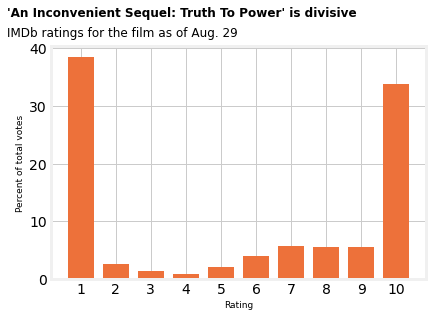

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="none")
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.75, color='#ED713A')
ax.set(facecolor='none')
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize=12,
             x=.35,
             y=1.1,
             fontweight='bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize=12, x=-1.1, y=42);
ax.set_xlabel('Rating', fontsize=9)
ax.set_ylabel('Percent of total votes', fontsize=9)
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [0]:
example

In [0]:
# Reproduce another example from FiveThityEight's shared data repository.
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2014/05/hickey-datalab-steak.png?w=575'
example_2 = Image(url=url, width=400)

display(example_2)

In [0]:
plt.style.use('fivethirtyeight')

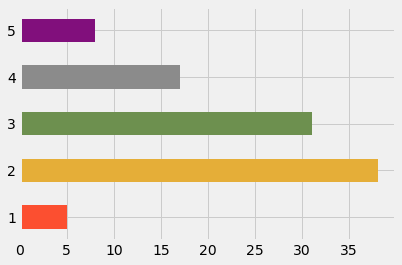

In [0]:
practice = pd.Series([5,38,31,17,8],
                     index=range(1,6))
practice.plot.barh(color=['C1', 'C2', 'C3', 'C4', 'C5']);

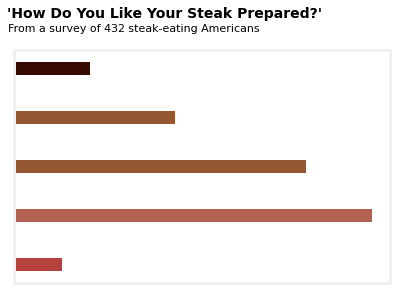

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")
practice.plot.barh(width=0.26, color=["#B5423F", '#B36153', '#955732', '#955732', '#370B02'])
ax.set(facecolor="white")
ax.set_title("'How Do You Like Your Steak Prepared?'", 
             fontsize=14, 
             x=.4, 
             y=1.11,
             fontweight='bold')
ax.text(s="From a survey of 432 steak-eating Americans", fontsize=11, x=-0.7, y=4.75)
plt.tick_params(axis='x',
                which='both',
                bottom=False,
                top=False,
                labelbottom=False)
plt.gca().set_xticks([])
plt.xticks([])
ax.set_xticks([])
plt.gca().set_yticks([])
plt.yticks([])
ax.set_yticks([]);               

In [0]:
url_538 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv'
steak = pd.read_csv(url_538)
steak.sample(5)

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
181,3.234858e+09,Lottery B,No,Yes,No,No,Yes,No,No,NaN,Female,18-29,NaN,Bachelor degree,East North Central
333,3.234820e+09,Lottery B,No,No,No,No,Yes,No,Yes,Well,Male,45-60,"$50,000 - $99,999",Bachelor degree,Mountain
357,3.234815e+09,Lottery B,No,Yes,Yes,No,Yes,No,Yes,Medium rare,NaN,NaN,NaN,NaN,NaN
326,3.234821e+09,Lottery B,No,Yes,NaN,No,Yes,Yes,No,NaN,Female,45-60,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
387,3.234808e+09,Lottery B,No,Yes,Yes,No,Yes,No,Yes,Medium rare,Female,45-60,"$100,000 - $149,999",Bachelor degree,South Atlantic


In [0]:
steak.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550
RespondentID,NaN,3.23757e+09,3.23498e+09,3.23497e+09,3.23497e+09,3.23496e+09,3.23496e+09,3.23496e+09,3.23496e+09,3.23495e+09,3.23495e+09,3.23495e+09,3.23495e+09,3.23495e+09,3.23495e+09,3.23495e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23494e+09,3.23493e+09,3.23493e+09,3.23493e+09,3.23493e+09,3.23493e+09,3.23493e+09,3.23493e+09,3.23493e+09,3.23493e+09,3.23493e+09,3.23493e+09,3.23493e+09,...,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23477e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09,3.23476e+09
"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Response,Lottery B,Lottery A,Lottery A,Lottery B,Lottery B,Lottery A,Lottery A,Lottery A,Lottery A,Lottery B,Lottery B,Lottery A,Lottery B,Lottery A,Lottery B,Lottery A,Lottery A,Lottery B,Lottery A,Lottery B,Lottery B,Lottery A,Lottery A,Lottery B,Lottery B,Lottery A,Lottery B,Lottery B,Lottery A,Lottery A,Lottery B,Lottery A,Lottery B,Lottery A,Lottery B,Lottery A,Lottery B,Lottery A,Lottery B,...,Lottery A,Lottery A,Lottery B,Lottery B,Lottery A,Lottery A,Lottery A,Lottery A,Lottery B,Lottery B,Lottery A,Lottery A,Lottery A,Lottery B,Lottery B,Lottery A,Lottery B,Lottery B,Lottery B,Lottery A,Lottery A,Lottery B,Lottery A,Lottery A,Lottery B,Lottery B,Lottery A,Lottery B,Lottery A,Lottery A,Lottery A,Lottery B,Lottery A,Lottery B,Lottery A,Lottery B,Lottery A,Lottery A,Lottery A,Lottery B
Do you ever smoke cigarettes?,Response,NaN,No,No,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,Yes,No,No,Yes,No,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,...,No,No,Yes,No,No,No,No,No,NaN,NaN,No,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,Yes
Do you ever drink alcohol?,Response,NaN,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,...,Yes,Yes,Yes,Yes,No,No,Yes,Yes,NaN,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,Yes
Do you ever gamble?,Response,NaN,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,No,Yes,No,...,Yes,No,Yes,Yes,No,No,Yes,Yes,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,Yes,Yes,Yes
Have you ever been skydiving?,Response,NaN,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,NaN,No,No,No,No,NaN,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No
Do you ever drive above the speed limit?,Response,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Have you ever cheated on your significant other?,Response,NaN,No,Yes,Yes,Yes,N

In [0]:
steak1 = steak['How do you like your steak prepared?']
steak1.head()

0       Response
1            NaN
2    Medium rare
3           Rare
4         Medium
Name: How do you like your steak prepared?, dtype: object

In [0]:
steak1.value_counts()

Medium rare    166
Medium         132
Medium Well     75
Well            36
Rare            23
Response         1
Name: How do you like your steak prepared?, dtype: int64

In [0]:
steak1 = steak1.drop(index=0)

In [0]:
steak1.value_counts()

Medium rare    166
Medium         132
Medium Well     75
Well            36
Rare            23
Name: How do you like your steak prepared?, dtype: int64

In [0]:
steak1.value_counts(normalize=True).mul(100).round(0).astype(int)

Medium rare    38
Medium         31
Medium Well    17
Well            8
Rare            5
Name: How do you like your steak prepared?, dtype: int64

In [0]:
svc = steak1.value_counts(normalize=True).mul(100).round(0).astype(int)

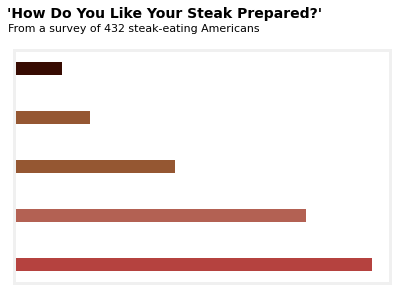

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")
svc.plot.barh(width=0.26, color=["#B5423F", '#B36153', '#955732', '#955732', '#370B02'])
ax.set(facecolor="white")
ax.set_title("'How Do You Like Your Steak Prepared?'", 
             fontsize=14, 
             x=.4, 
             y=1.11,
             fontweight='bold')
ax.text(s="From a survey of 432 steak-eating Americans", fontsize=11, x=-0.7, y=4.75)
plt.tick_params(axis='x',
                which='both',
                bottom=False,
                top=False,
                labelbottom=False)
plt.gca().set_xticks([])
plt.xticks([])
ax.set_xticks([])
plt.gca().set_yticks([])
plt.yticks([])
ax.set_yticks([]);               

In [0]:
display(example_2)

In [0]:
# Can use this for adding the number labels at the ends of bars:
# ax.text(x=0, y=0, s='this is a test')

# Current plan is to make manual list with those [['5', '38', '31', '17', '8%']]

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here